In [18]:
from JupyterImport import *
root_logger.setLevel(logging.CRITICAL)
mpl.rcParams['figure.figsize'] = (15,6)

## Setting up left side

Right side HQPC

In [19]:
dats = get_dats([198, 199])

In [20]:
for dat in dats:
    print(dat.Data.data_keys)

{'Exp_fdAW_1', 'Exp_x_array', 'x_array', 'Exp_fd0adc', 'Exp_fdAW_0', 'Exp_CA0current'}
{'Exp_fdAW_1', 'Exp_x_array', 'x_array', 'Exp_fd0adc', 'Exp_fdAW_0', 'Exp_CA0current'}


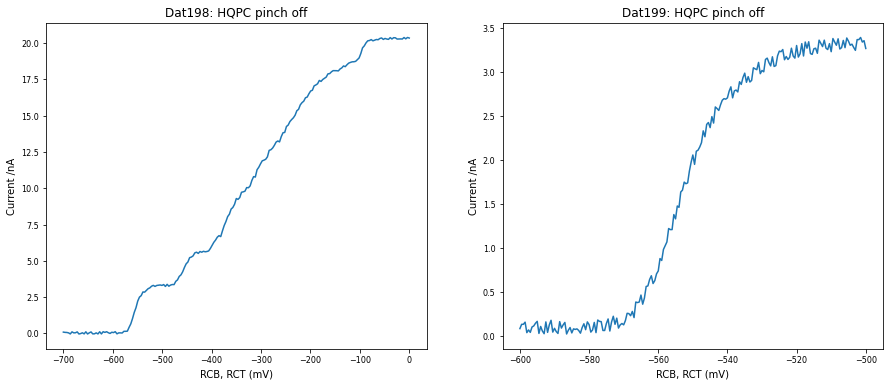

In [21]:
fig, axs = plt.subplots(1,2)
for dat, ax in zip(dats, axs):
    ax.plot(dat.Data.x_array, dat.Data.Exp_CA0current)
    P.ax_setup(ax, f'Dat{dat.datnum}: HQPC pinch off', dat.Logs.x_label, 'Current /nA')

## DCbias repeats with varying params

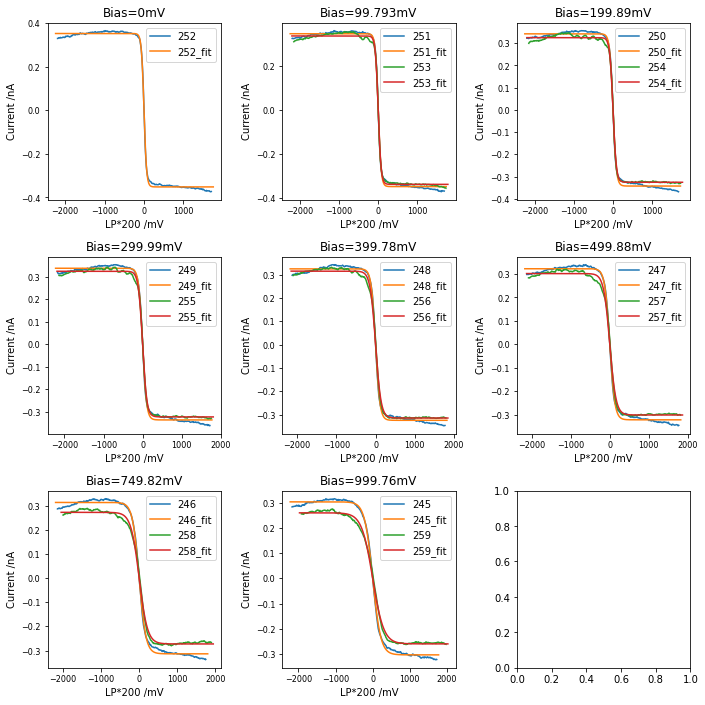

In [25]:
from src.Scripts.Aug17_TransitionVsBias import get_transition_vs_bias_repeats
dats = get_dats(range(245, 259+1))

%matplotlib inline
tbr = get_transition_vs_bias_repeats(dats)
plt.tight_layout()

### VS field

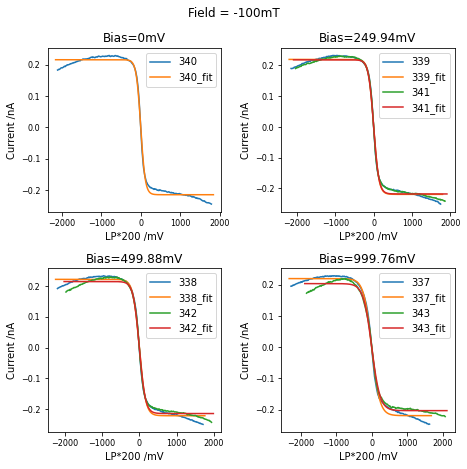

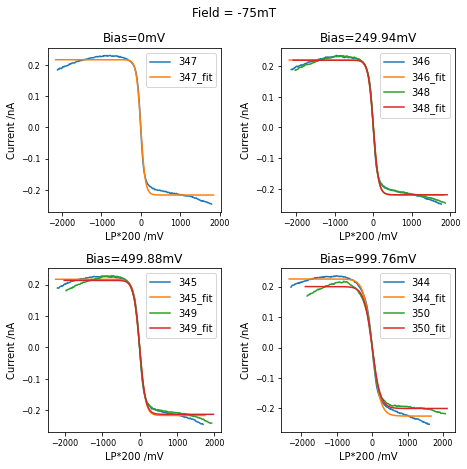

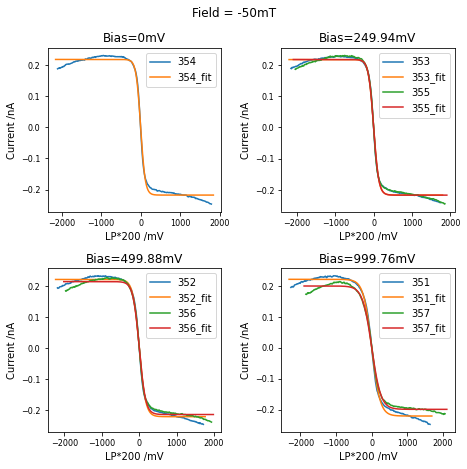

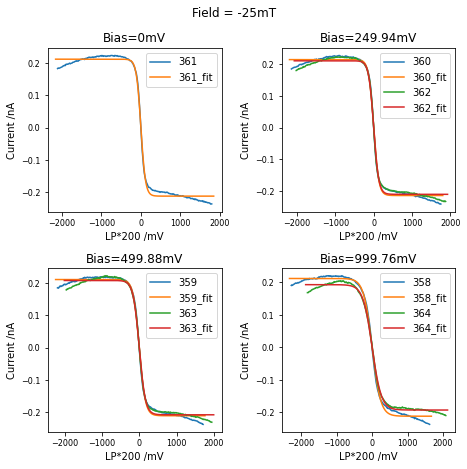

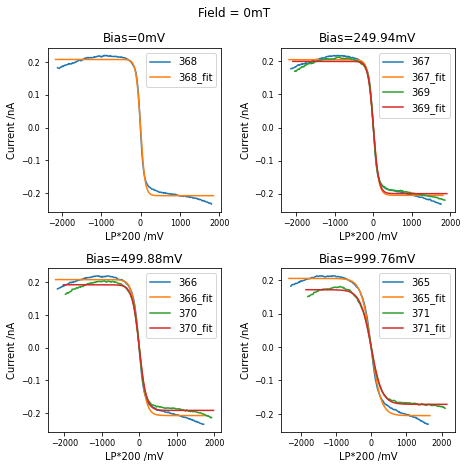

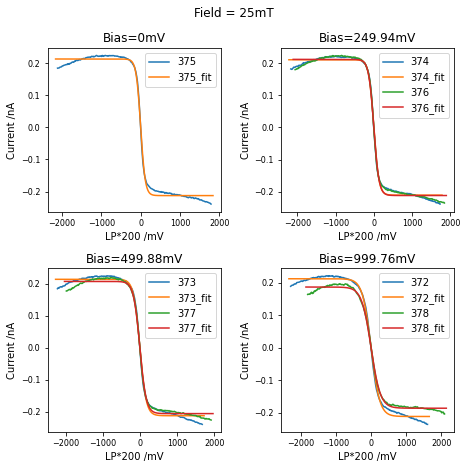

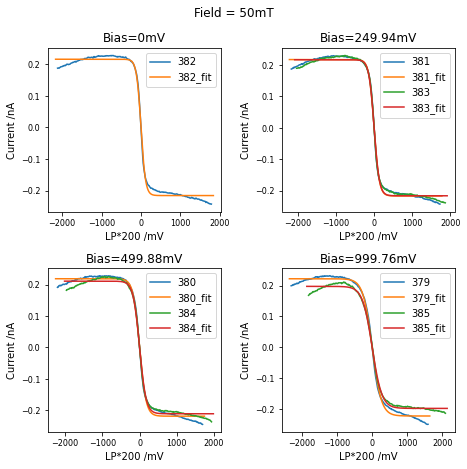

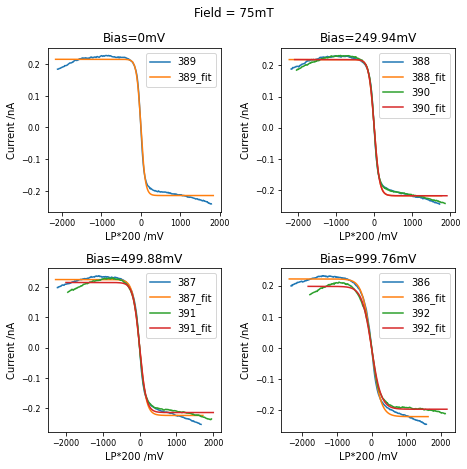

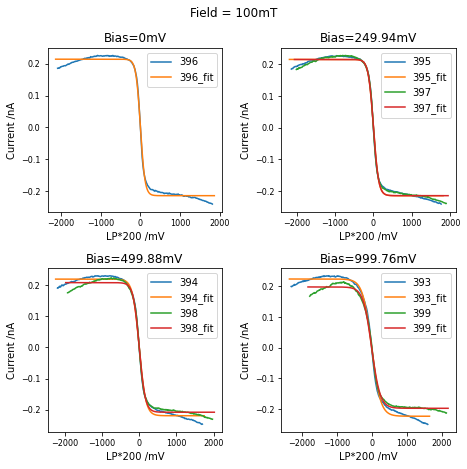

In [34]:
from src.DataStandardize.ExpSpecific.Aug20 import Fixes
dats = get_dats(range(337, 399+1))
for dat in dats:
    Fixes._add_magy(dat)
    
fields = set([round(dat.Other.magy.field) for dat in dats])
dat_dict = {f: [dat for dat in dats if round(dat.Other.magy.field) == f] for f in fields}

%matplotlib inline
tbrs = dict()
for k, v in sorted(dat_dict.items()):
    tbrs[k] = get_transition_vs_bias_repeats(v)
    tbrs[k].fig.suptitle(f'Field = {k}mT')
    tbrs[k].fig.figsize=(10,10)
    tbrs[k].fig.tight_layout()